<a href="https://colab.research.google.com/github/AlexMourao19/Titanic---Machine-Learning-from-Disaster/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#data--> dados de treino
data=pd.read_csv('train.csv')

#teste-->dados de teste (submissão no Kaggle)
teste=pd.read_csv('test.csv')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#tirar o nome, cabina e o ticket e o Id
data.drop({'Name', 'Cabin', 'Ticket', 'PassengerId'}, axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
##tirar o nome, cabina, ticket e o Id
IdTest=teste['PassengerId']#-->guadar o id para submissão no kaggle
teste.drop({'Name', 'Cabin', 'Ticket', 'PassengerId'}, axis=1, inplace=True)
teste

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [ ]:
#ver valores NaN para treino
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
#ver valores NaN para teste
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
#resolver os NaN para a idade de treino
mode=data['Age'].mode()[0]#usar a moda da idade para preencher os restantes
data.fillna({'Age': mode}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
#resolver os NaN para a idade de teste
mode=teste['Age'].mode()[0]#usar a moda da idade para preencher os restantes
teste.fillna({'Age': mode}, inplace=True)

teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
#resolver o embarked treino
#apagar as linhas onde embarked é NaN dado que só são duas
data.dropna(inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
#resolver o fare teste
#temos de manter a linha do NaN para entrega no kaggle
mode=data['Fare'].mode()[0]
teste.fillna({'Fare': mode}, inplace=True)
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
#organizar os valores de idade

#idade treino
intervalos=[0, 5, 17, 25, 50, data['Age'].max()]
tipo=['Infant', 'Kid', 'Young-Adult', 'Adult', 'Old']
data['Age'] = pd.cut(data['Age'], bins=intervalos, labels=tipo)

#idade teste
intervalos=[0, 5, 17, 25, 50, teste['Age'].max()]
teste['Age'] = pd.cut(teste['Age'], bins=intervalos, labels=tipo)

In [ ]:
#organizar fare
#print(data['Fare'].max())

#fare treino
intervalos=[0, 20, 40, 60, 100, data['Fare'].max()]
tipo=['Cheap', 'Medium', 'Medium-High', 'High', 'Expensive']
data['Fare'] = pd.cut(data['Fare'], bins=intervalos, labels=tipo)
#fare=pd.DataFrame(data['Fare'].value_counts())
#print(fare)

#fare teste
intervalos=[0, 20, 30, 60, 100, teste['Fare'].max()]
teste['Fare'] = pd.cut(teste['Fare'], bins=intervalos, labels=tipo)
#fare=pd.DataFrame(teste['Fare'].value_counts())
#print(fare)

ANALISE

Survival

In [ ]:
survived=pd.DataFrame(data['Survived'].value_counts())
survived

,Survived
0,549
1,340


<AxesSubplot: xlabel='Survived', ylabel='count'>

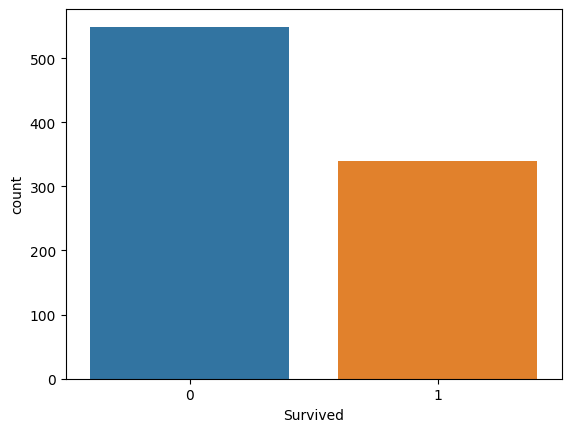

In [ ]:
sns.countplot(x='Survived', data=data)

Fare

<AxesSubplot: xlabel='Fare', ylabel='count'>

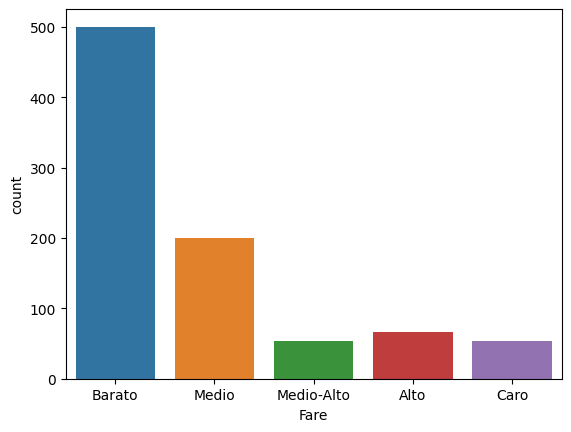

In [ ]:
sns.countplot(x='Fare', data=data)
#print(data['Fare'].max())

<AxesSubplot: xlabel='Fare', ylabel='Survived'>

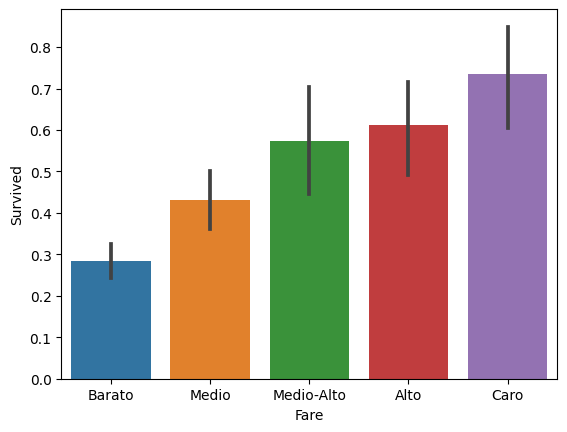

In [ ]:
sns.barplot(x='Fare', y='Survived', data=data)

Pclass

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

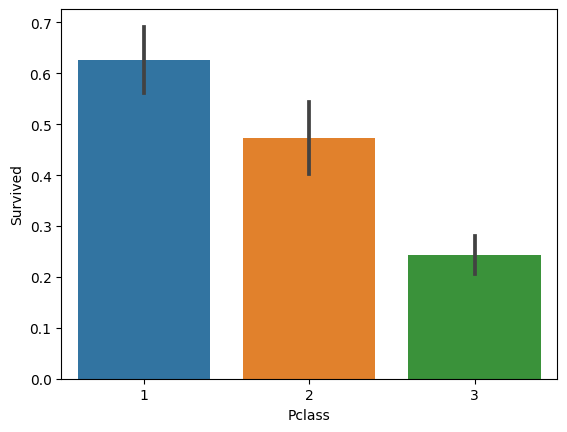

In [ ]:
sns.barplot(x = 'Pclass', y = 'Survived', data=data)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

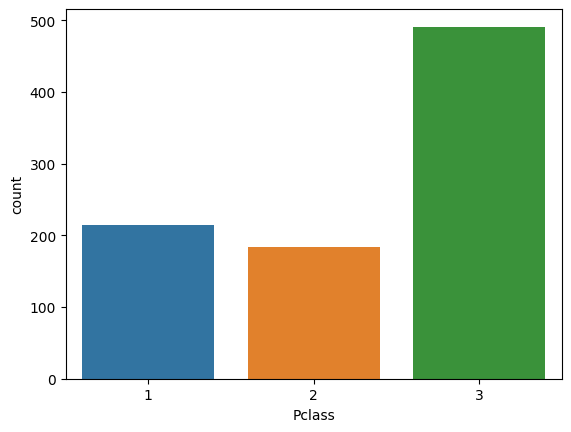

In [ ]:
sns.countplot(x='Pclass', data=data)

SibSp

<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

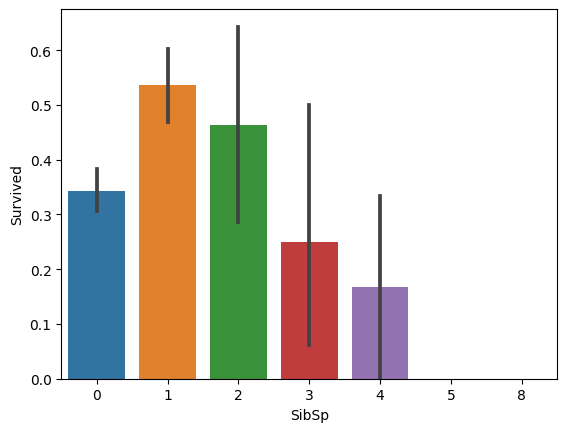

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=data)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

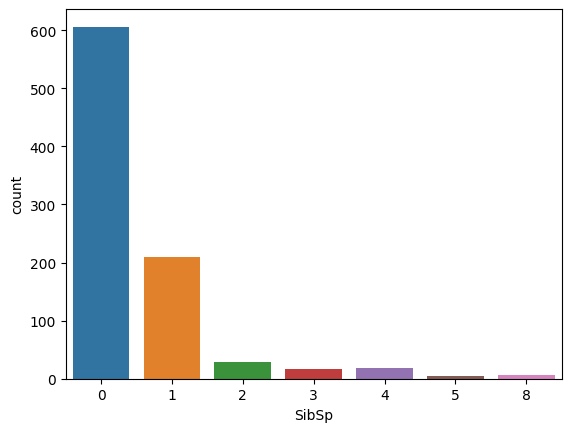

In [ ]:
sns.countplot(x='SibSp', data=data)

Parch

<AxesSubplot: xlabel='Parch', ylabel='Survived'>

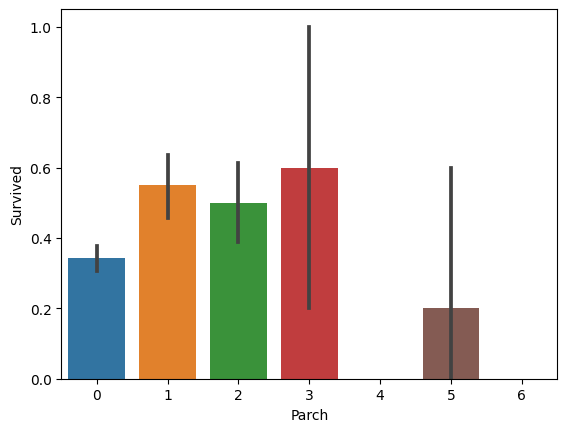

In [ ]:
sns.barplot(x ='Parch', y='Survived', data=data)

<AxesSubplot: xlabel='Parch', ylabel='count'>

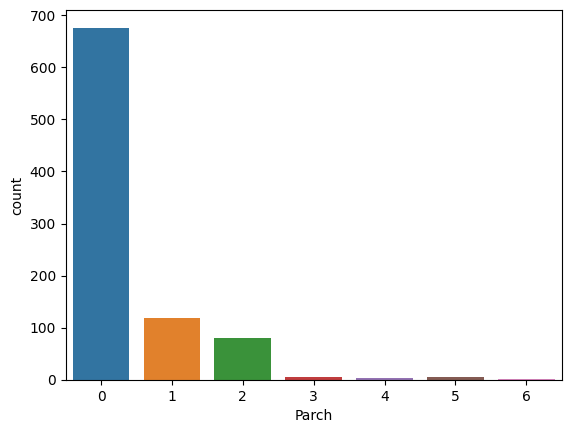

In [ ]:
sns.countplot(x='Parch', data=data)

Embarked

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

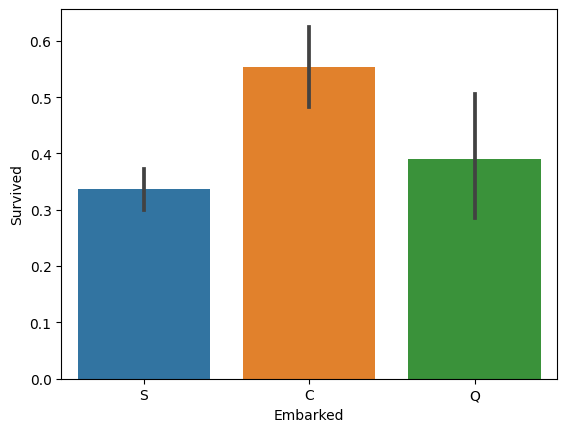

In [ ]:
sns.barplot(x = 'Embarked', y = 'Survived', data=data)

<AxesSubplot: ylabel='Embarked'>

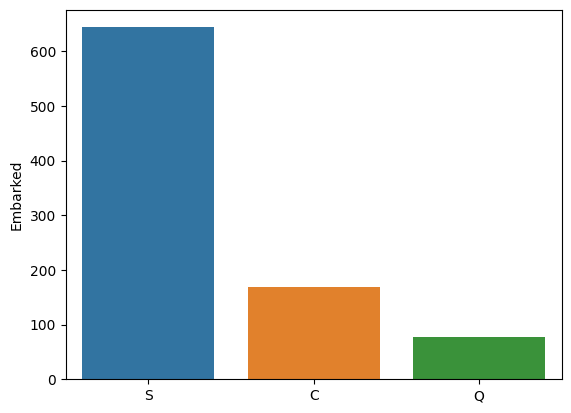

In [ ]:
sns.barplot(x = data['Embarked'].value_counts().index, y = data['Embarked'].value_counts() , data=data)

Idade

<AxesSubplot: xlabel='Age', ylabel='Survived'>

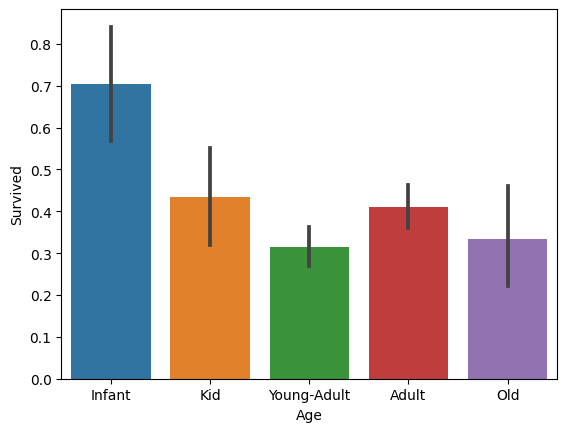

In [ ]:
sns.barplot(x = 'Age', y = 'Survived', data=data)

<AxesSubplot: xlabel='Age', ylabel='count'>

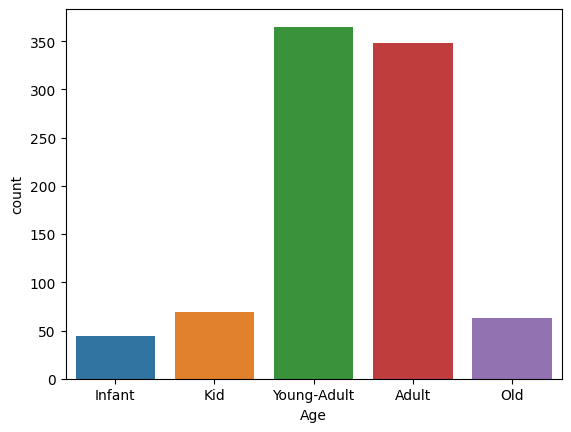

In [ ]:
sns.countplot(x='Age', data=data)

Sex

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

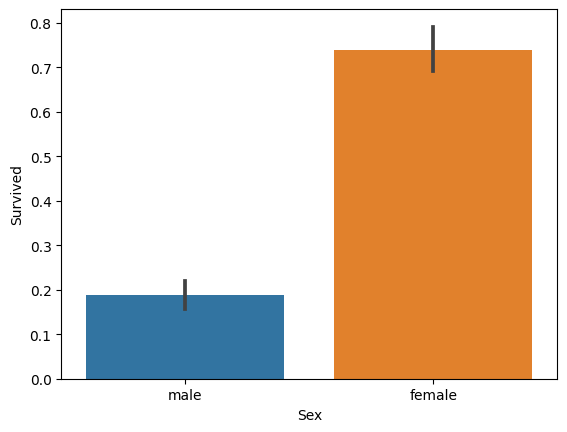

In [ ]:
sns.barplot(x = 'Sex', y = 'Survived', data=data)

<AxesSubplot: ylabel='Sex'>

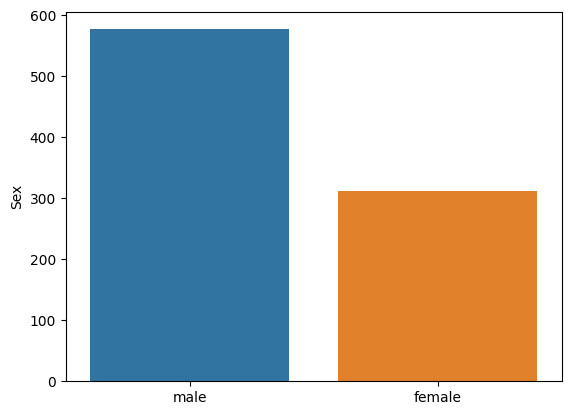

In [ ]:
sns.barplot(x = data['Sex'].value_counts().index, y = data['Sex'].value_counts() , data=data)

MODELOS

In [ ]:
#resolver valores não numericos
#treino
dummies=['Age', 'Embarked', 'Sex', 'Fare']
dummy_data=pd.get_dummies(data[dummies])
data=pd.concat([data, dummy_data], axis=1)
data.drop(dummies, axis=1, inplace=True)

data

,Survived,Pclass,SibSp,Parch,Age_Infant,Age_Kid,Age_Young-Adult,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Fare_Barato,Fare_Medio,Fare_Medio-Alto,Fare_Alto,Fare_Caro
0,0,3,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0
1,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1,3,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0
3,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,0,3,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0
887,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
888,0,3,1,2,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
889,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0


In [ ]:
#resolver valores não númericos
#teste
dummy_data=pd.get_dummies(teste[dummies])
teste=pd.concat([teste, dummy_data], axis=1)
teste.drop(dummies, axis=1, inplace=True)

teste

,Pclass,SibSp,Parch,Age_Infant,Age_Kid,Age_Young-Adult,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Fare_Barato,Fare_Medio,Fare_Medio-Alto,Fare_Alto,Fare_Caro
0,3,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
1,3,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0
2,2,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
3,3,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0
4,3,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0
414,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
415,3,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0
416,3,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#dividir a data de treino
dtest=data[601:]
dtrain=data[0:600]


xtrain=dtrain.drop('Survived', axis=1)
ytrain=dtrain['Survived']

ytest=dtest['Survived']
xtest=dtest.drop('Survived', axis=1)

log_reg =LogisticRegression(max_iter=1000)
log_reg.fit(xtrain, ytrain)

ypred=log_reg.predict(xtest)

accuracy_score(ypred, ytest)

0.8020833333333334

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)

ypred=rf.predict(xtest)

accuracy_score(ypred, ytest)

0.8194444444444444

Naibe Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(xtrain,ytrain)

ypred=gnb.predict(xtest)

accuracy_score(ypred, ytest)

0.8020833333333334

S. Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()

sgd.fit(xtrain, ytrain)

ypred=sgd.predict(xtest)

accuracy_score(ypred, ytest)

0.8125

k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

neigh.fit(xtrain, ytrain)

ypred=neigh.predict(xtest)

accuracy_score(ypred, ytest)

0.8263888888888888

Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

clf=Perceptron()

clf.fit(xtrain,ytrain)

ypred=neigh.predict(xtest)

accuracy_score(ypred, ytest)


0.8263888888888888

Previsão Kaggle e submissão

In [ ]:
ypred=neigh.predict(teste)

resultados = {'PassengerId': IdTest, 'Survived': ypred}

#print(final_data)

KaggleSubmit = pd.DataFrame(data=resultados)

KaggleSubmit.to_csv('submission.csv', index =False)

#Obteve-se uma "accuracy" de 77% na entrega do kaggle